# Plot QRS from RRTMG and waccm_hrates

### Imports

In [1]:
#Import usual pangeo libraries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

### Data Ingest

In [47]:
# Read in the data using xarray or some other package
ds1 = xr.open_dataset('/glade/scratch/marsh/fwsd_f09f09_baseline.002/run/fwsd_f09f09_baseline.002.cam.h1.1980-01-05-00000.nc')
ds2 = xr.open_dataset('/glade/scratch/marsh/fwsd_f09f09_test.001/run/fwsd_f09f09_test.001.cam.h1.1980-01-05-00000.nc')

In [48]:
ds1

<xarray.Dataset>
Dimensions:       (ilev: 89, lat: 192, lev: 88, lon: 288, nbnd: 2, time: 13)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 977.5 992.5
  * ilev          (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 985.0 1e+03
  * time          (time) datetime64[ns] 1980-01-05 ... 1980-01-06
Dimensions without coordinates: nbnd
Data variables: (12/45)
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    ...            ...
    QRS_TOT       (time, lev, lat, lon) float32 ...
    QTHERMAL      (time, lev, lat, lon) float32 ...
    T             (time, lev, lat, lon) float32 ...
    U             (time, lev, lat, lon) float32 ...
    V             (time, lev, lat, lon) float32 ...
    Z3            (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              fwsd_f09f09_baseline.002
    logname:           marsh
    host:              cheyenne1
    initial_file:      c_cesm2.1b01_fswd_1975_cntrl_v2.cam.i.1980-01-01-00000.nc
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0....
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_2

### Extract heating rates

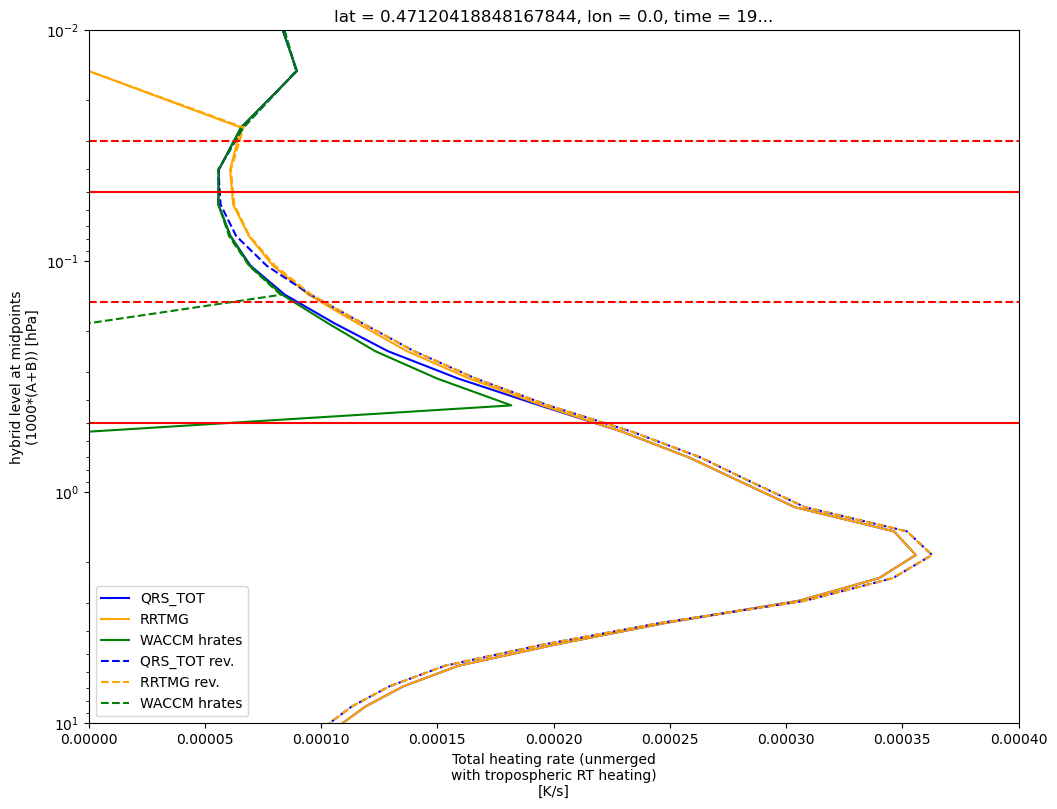

In [49]:
ds1['QRS_TOT'].isel(time=6, lat=96, lon=0).plot(figsize=(12,9), color='blue',
              xlim=(0,4e-4),
              ylim=(10,1e-2), yscale='log', y="lev", 
              yincrease=False, label='QRS_TOT')

ds1['QRS'].isel(time=6, lat=96, lon=0).plot(label='RRTMG', y='lev', color='orange')
ds1['QRS_MLT'].isel(time=6, lat=96, lon=0).plot(label='WACCM hrates', y='lev', color='green')

ds2['QRS_TOT'].isel(time=6, lat=96, lon=0).plot( y="lev",label='QRS_TOT rev.', linestyle='--', color='blue')
ds2['QRS'].isel(time=6, lat=96, lon=0).plot(label='RRTMG rev.', y='lev', linestyle='--', color='orange')
ds2['QRS_MLT'].isel(time=6, lat=96, lon=0).plot(label='WACCM hrates', y='lev', linestyle='--', color='green')

#        min_pressure_sw =  5._r8  
#        max_pressure_sw = 50._r8   

plt.axhline(y=5e-2, color='red')
plt.axhline(y=50e-2, color='red')

#        min_pressure_sw =  3._r8  
#        max_pressure_sw = 15._r8   

plt.axhline(y=3e-2, color='red', linestyle='--')
plt.axhline(y=15e-2, color='red', linestyle='--')


plt.legend()

plt.show()

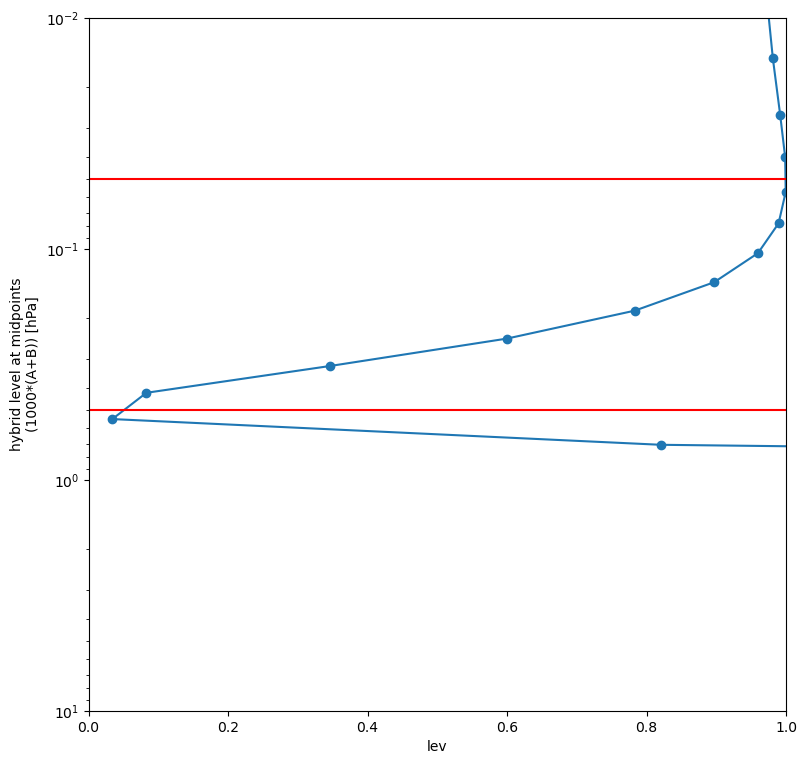

In [39]:
min_pressure_sw =  5.e-2  
max_pressure_sw = 50.e-2   

delta_merge_sw = max_pressure_sw - min_pressure_sw
midpoint_sw = (max_pressure_sw + min_pressure_sw)/2.

lev = ds['lev']

qrs_wt = 0.5 + 1.5*((lev-midpoint_sw)/delta_merge_sw)- 2.*((lev-midpoint_sw)/delta_merge_sw)**3.

(1-qrs_wt).plot(figsize=(9,9),
            xlim=(0,1),
            ylim=(10,1e-2), yscale='log', y="lev",
            yincrease=False, label='QRS_WT', marker='o')
plt.axhline(y=5e-2, color='red')
plt.axhline(y=50e-2, color='red')

plt.show()

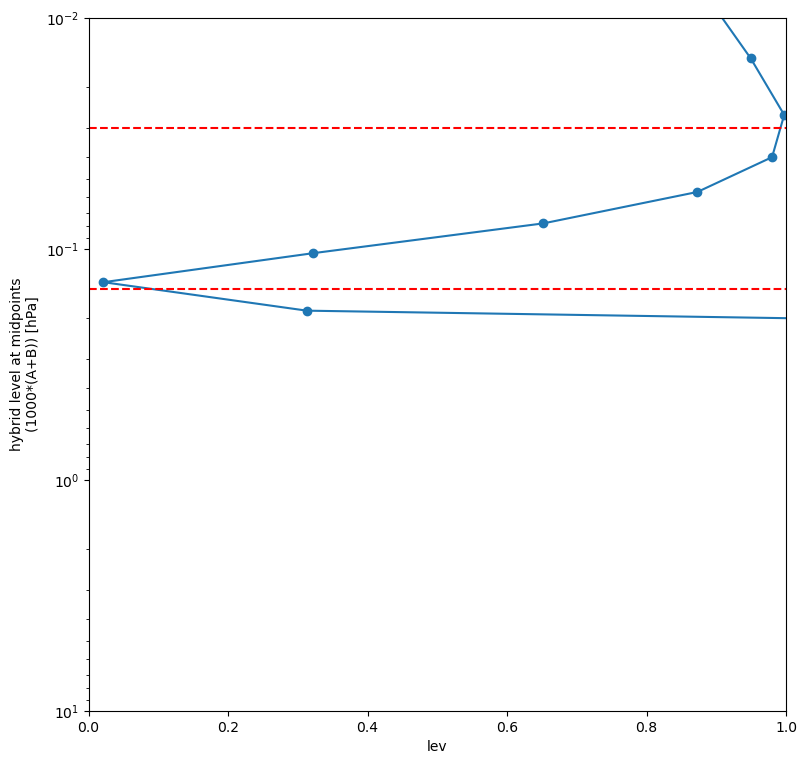

In [38]:
min_pressure_sw = 3.e-2  
max_pressure_sw = 15.e-2   

delta_merge_sw = max_pressure_sw - min_pressure_sw
midpoint_sw = (max_pressure_sw + min_pressure_sw)/2.

lev = ds['lev']

qrs_wt = 0.5 + 1.5*((lev-midpoint_sw)/delta_merge_sw)- 2.*((lev-midpoint_sw)/delta_merge_sw)**3.

(1-qrs_wt).plot(figsize=(9,9),
            xlim=(0,1),
            ylim=(10,1e-2), yscale='log', y="lev",
            yincrease=False, label='QRS_WT', marker='o')
plt.axhline(y=3e-2, color='red', linestyle='--')
plt.axhline(y=15e-2, color='red', linestyle='--')

plt.show()

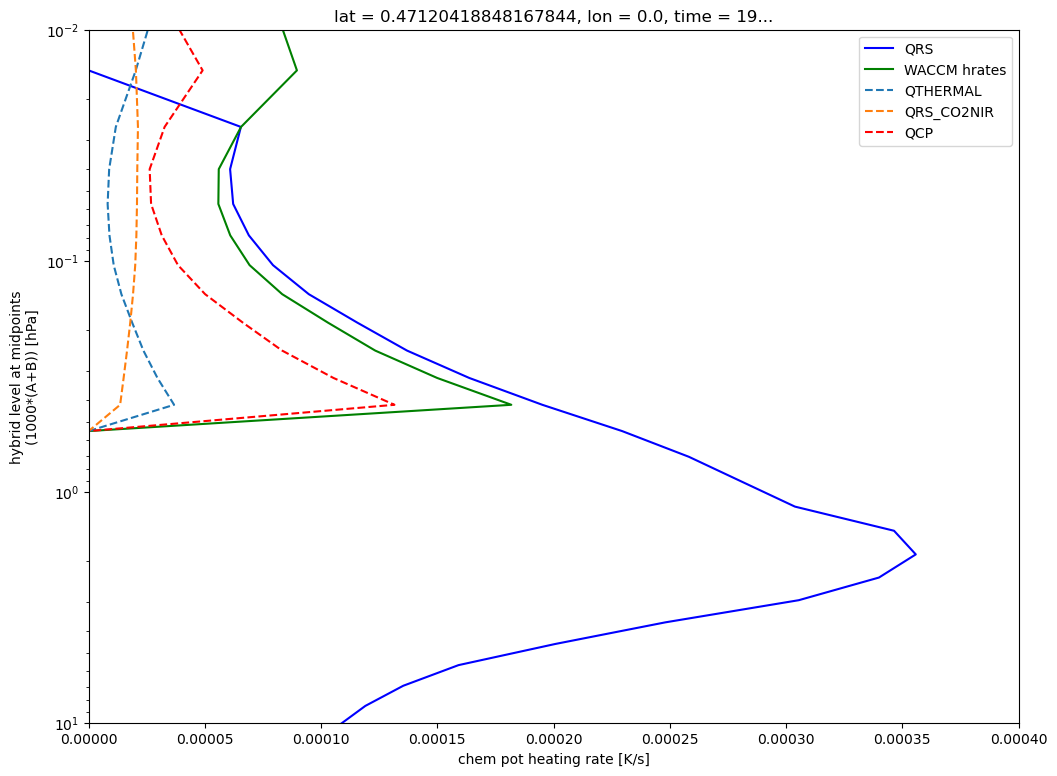

In [46]:
ds1['QRS'].isel(time=6, lat=96, lon=0).plot(figsize=(12,9), color='blue',
              xlim=(0,4e-4),
              ylim=(10,1e-2), yscale='log', y="lev", 
              yincrease=False, label='QRS')

ds1['QRS_MLT'].isel(time=6, lat=96, lon=0).plot(label='WACCM hrates', y='lev', color='green')
ds1['QTHERMAL'].isel(time=6, lat=96, lon=0).plot(label='QTHERMAL', y='lev', linestyle='--')
ds1['QRS_CO2NIR'].isel(time=6, lat=96, lon=0).plot(label='QRS_CO2NIR', y='lev', linestyle='--')
ds1['QCP'].isel(time=6, lat=96, lon=0).plot(label='QCP', y='lev', color='red', linestyle='--')

plt.legend()
plt.show()